### Some Basic Quantum Circuits 

In [ ]:
# !pip3 install qiskit 

In [ ]:
import qiskit as q
import matplotlib.pyplot as plt
from qiskit import IBMQ

In [ ]:
qr = q.QuantumRegister(2)
cr = q.ClassicalRegister(2)

circuit = q.QuantumCircuit(qr, cr)
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/




_First Circuit_:

2 Hadamard gates in parallel: 

Let's review the Hadamard gate operation on $|0\rangle$ and $|1\rangle$, $H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ and $H|1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$. 

2 Hadamard Gates in series always return the original state. Let's apply two H gates in parallel. Then we will understand the result.  


In [ ]:
circuit.h(qr[0]) # apply hadamard gate on first qubit. 
circuit.h(qr[1]) # apply hadamard gate on second qubit. 
# apply cnot gate.  
display(circuit.draw())

┌───┐
q0_0: ┤ H ├
      ├───┤
q0_1: ┤ H ├
      └───┘
c0: 2/═════

#### What we are expecting at this stage ?

Initial stages of the qubits are always zero unless they are initialized to a different state. So H gate acting on stage $|0\rangle$ would give $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$. Since there are 2 H gates acting on stage $|0\rangle$ we have the output as tensor product of $|+\rangle \otimes |+\rangle = \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right) $.

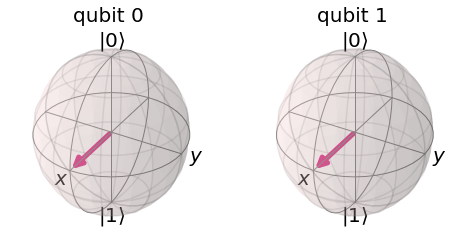

In [ ]:
#### see the state-vector 
statevec = q.Aer.get_backend('statevector_simulator')
final_state = q.execute(circuit, statevec).result().get_statevector()
q.visualization.plot_bloch_multivector(final_state) 

#### We see above that both qubits are in $|+\rangle$ state. 

In [ ]:
circuit.measure(qr, cr)
circuit.draw(scale=2)

┌───┐┌─┐   
q0_0: ┤ H ├┤M├───
      ├───┤└╥┘┌─┐
q0_1: ┤ H ├─╫─┤M├
      └───┘ ║ └╥┘
c0: 2/══════╩══╩═
            0  1

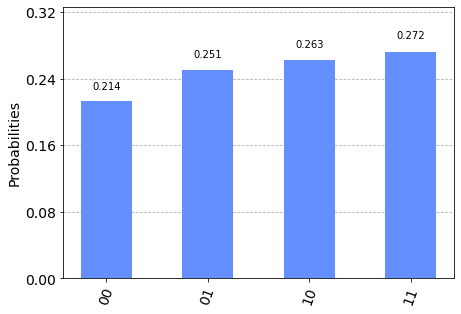

In [ ]:
#### simulate result on a local computer 

simulator = q.Aer.get_backend(name='qasm_simulator')
results = q.execute(circuit, backend=simulator, ).result()
q.visualization.plot_histogram(results.get_counts(circuit)) 

_2nd Circuit_:

Let's extend the circuit above by adding another Hadamard gate in parallel.  

This operation can be written as 

$H^{\otimes 3} |0\rangle |0\rangle |0\rangle = \left(H\otimes H\otimes H \right) |0\rangle |0\rangle|0\rangle = \frac{1}{\sqrt{2^3}} \left(|000\rangle + |001\rangle + |010\rangle + |011\rangle +|100\rangle + |101\rangle  + |110\rangle +|  111\rangle\right)$ 

Amplitude of each state will be $\approx \frac{1}{8} = 0.125$

Do you see a continuation from the previous circuit ? 


In [ ]:
### try a different circuit where we apply X gate before applying H gate. 

qr1 = q.QuantumRegister(3)
cr1 = q.ClassicalRegister(3)

circuit1 = q.QuantumCircuit(qr1, cr1)
# circuit1.draw()


circuit1.h(qr1[0]) # apply the H gate on q0
circuit1.h(qr1[1]) # apply H gate on q_1
circuit1.h(qr1[2]) # add H gate on q_2

### draw the circuit
circuit1.draw()

┌───┐
q2_0: ┤ H ├
      ├───┤
q2_1: ┤ H ├
      ├───┤
q2_2: ┤ H ├
      └───┘
c1: 3/═════

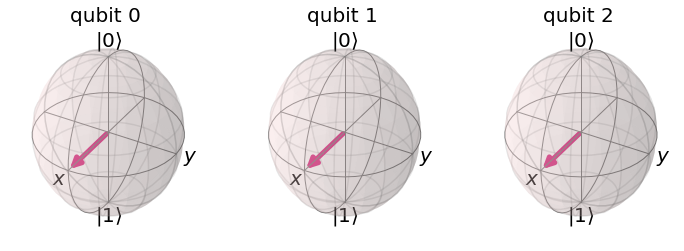

In [ ]:
#### plt the state vector 

statevec1 = q.Aer.get_backend('statevector_simulator')
final_state1 = q.execute(circuit1, statevec1).result().get_statevector()
q.visualization.plot_bloch_multivector(final_state1) # the state doesn't not change after application of the CNOT gate 
#### unchanged state as expected 

In [ ]:
circuit1.measure(qr1, cr1)
circuit1.draw(scale=2)

┌───┐┌─┐      
q2_0: ┤ H ├┤M├──────
      ├───┤└╥┘┌─┐   
q2_1: ┤ H ├─╫─┤M├───
      ├───┤ ║ └╥┘┌─┐
q2_2: ┤ H ├─╫──╫─┤M├
      └───┘ ║  ║ └╥┘
c1: 3/══════╩══╩══╩═
            0  1  2

#### We see above both the qubits are in $|+\rangle$ state.



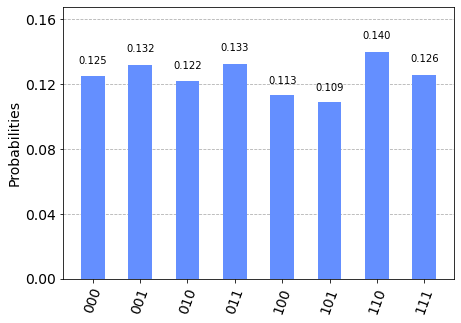

In [ ]:
circuit1.measure(qr1, cr1)
### simulate result on local computer 
simulator1 = q.Aer.get_backend('qasm_simulator')
results1 = q.execute(circuit1, backend=simulator1, ).result()
q.visualization.plot_histogram(results1.get_counts(circuit1)) 

Generalized Rule :  

Based on the above two examples, we can now develop a generalized rule for N hadamard gates in parallel. 

First of all let's generalize how we can write sum over states. For example the summed state: $\frac{1}{2} \left(|00\rangle + |01\rangle + |10\rangle + |11\rangle \right)$ (which results from $H^{\otimes 2}|0\rangle |0\rangle$), can be written as: 

 $H^{\otimes 2}|0\rangle |0\rangle = \frac{1}{\sqrt{2}} \sum \limits_{x\in \{ 0, 1\}^2}|x\rangle$.   

Here $|x\rangle$ denotes one of the states $|00\rangle, |01\rangle, |10\rangle, |11\rangle$ . If we write $x\in \{0, 1\}^3$ then it means $x$ denotes one of the states $|000\rangle, |001\rangle, |010\rangle, |011\rangle, |100\rangle, |101\rangle, |110\rangle,|110\rangle, |111\rangle,$. 

Using this we can generalize a rule: 

Application of $H^{\otimes n}$ to a product state with $n$ copies of $|0\rangle$ is: 

$H^{\otimes n} \left(|0\rangle ^{\otimes n}\right) = \frac{1}{\sqrt{2^n}} \sum \limits_{x\in \{0, 1\}^n} |x\rangle$.  

### Uniform Superposition on a Real Quantum Computer

The result we have shown earlier is simulated using qiskit in our computer, but we can also use free IBM Quantum Computers to ceck the results. I have discussed before in a [post](https://medium.com/a-bit-of-qubit/quantum-computing-understanding-simple-quantum-gates-using-qiskit-6bb96f52793b) how to get started with setting up account in [IBM-Q](https://quantum-computing.ibm.com/) etc.   

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


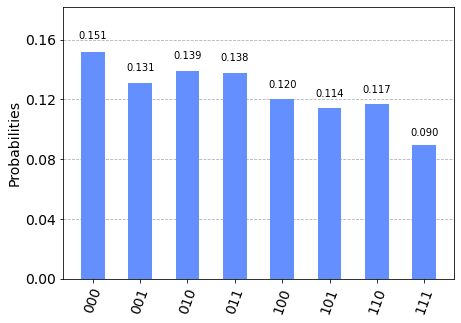

In [ ]:
# Now we will use IBM Quantum Computer to see the result 

IBMQ.save_account('your token')
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_valencia') # check which computer has 0 jobs on queue
job = q.execute(circuit1, backend=qcomp)
q_result = job.result()

q.visualization.plot_histogram(q_result.get_counts(circuit1))

##### Quantum Interference

$|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ and operate H gate on it to create

$H|\psi\rangle = \left(\frac{\alpha + \beta}{\sqrt 2}\right)|0\rangle + \left(\frac{\alpha - \beta}{\sqrt 2}\right)|1\rangle$. 

Positive interference w.r.t to $|0\rangle$ and negative interference w.r.t to $|1\rangle$. 